<a href="https://colab.research.google.com/github/muthiearml/MachineLearning/blob/main/(Lecture5)EDA_Laptop_Price_MuthieArmaliaS_1103200178.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediksi Analitik Penjualan Rumah di King County, Washington State, USA
Dataset ini berisi data riwayat penjualan rumah di King Country, Washington State, USA, pada bulan Mei 2014 hingga Mei 2015.

**Impor *Library***

*Library* numpy digunakan untuk memproses larik atau array.

*Library* matplotlib digunakan membuat visualisasi data dalam dua dimensi.

*Library* seaborn dibangun di atas *library* matplotlib, digunakan untuk membuat visualisasi data.

*Library* pandas digunakan untuk menganalisis dan memanipulasi data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# DATA UNDERSTANDING DAN DATA PREPARATION

**Memuat Dataset (Data Loading)**

Memuat dataset dengan nama file 'kc_house_data.csv' dengan format file csv (comma separated value)

In [5]:
house = pd.read_csv('/content/drive/MyDrive/S1 - Teknik Komputer/Dataset/laptopPrice (1).csv')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Menampilkan Dataframe**

In [6]:
house

,brand,processor_brand,processor_name,ram_gb,os_bit,graphic_card_gb,msoffice,Price,rating
0,ASUS,Intel,Core i3,4 GB,64-bit,0 GB,No,34649,2 stars
1,Lenovo,Intel,Core i3,4 GB,64-bit,0 GB,No,38999,3 stars
2,Lenovo,Intel,Core i3,4 GB,64-bit,0 GB,No,39999,3 stars
3,ASUS,Intel,Core i5,8 GB,32-bit,2 GB,No,69990,3 stars
4,ASUS,Intel,Celeron Dual,4 GB,64-bit,0 GB,No,26990,3 stars
...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,4 GB,64-bit,0 GB,No,135990,3 stars
819,ASUS,AMD,Ryzen 9,4 GB,64-bit,0 GB,No,144990,3 stars
820,ASUS,AMD,Ryzen 9,4 GB,64-bit,4 GB,No,149990,3 stars
821,ASUS,AMD,Ryzen 9,4 GB,64-bit,4 GB,No,142990,3 stars


Terdapat 21613 data yang terdiri dari 21 atribut.

id: notasi rumah

date: tanggal rumah terjual

price: harga penjualan rumah, fitur target

bedrooms: jumlah kamar tidur pada rumah

bathrooms: jumlah kamar mandi pada rumah, nilai .5 merupakan toilet

sqft_living: luas *living area* dalam satuan *square feet*

sqft_lot: luas tanah dalam satuan *square feet*

floors: jumlah tingkat/lantai rumah

waterfront: rumah dengan view menghadap pantai

view: Indeks seberapa bagus pemandangan rumah tersebut

condition: kondisinya secara keseluruhan

grade: nilai keseluruhan yang diberikan kepada *housing-unit,* berdasarkan sistem penilaian King County

sqft_above: luas rumah yang berada di atas permukaan tanah dalam satuan *square feet*

sqft_basement: luas ruang-bawah-tanah dalam satuan *square feet*

yr_built: tahun pertama kali dibangun

yr_renovated: tahun terakhir rumah direnovasi

zipcode: kode pos

lat: koordinat garis lintang

long: koordinat garis bujur

sqft_living15: Luas *living area* untuk *nearest 15 neighbors*

sqft_lot15: Luar area tanah untuk *nearest 15 neighbors*

**Anomali Data pada Atribut floors**

Terdapat anomali data pada atribut floors. Anomali tersebut berupa nilai pecahan yang ada pada atribut tersebut seperti 3.50, dan tipe data floors berupa float. Sedangkan, banyaknya lantai pada suatu bangunan pasti bernilai bilangan bulat.

**Anomali Data pada Atribut bathrooms**

Dari peninjauan sekilas dataset di atas, didapatkan nilai dari fitur 'bathrooms' yaitu 0.75, 1.00, 2.00, 2.25, 2.50, 3. Anomali terjadi pada banyaknya kamar mandi yang bernilai pecahan. Meski pada keterangan fitur-fitur dijelasakan bahwa nilai .5 pada fitur bathrooms menunjukkan toilet bukan kamar mandi, namun nilai 'bathrooms' yang berkelipatan .25 seperti .25 dan .75 belum diketahui apa maksud dari nilai tersebut.

**Anomali Kualitas Data pada Atribut id**

In [7]:
print(house.nunique(axis=0))

brand                8
processor_brand      3
processor_name      11
ram_gb               4
os_bit               2
graphic_card_gb      5
msoffice             2
Price              405
rating               5
dtype: int64


Dari hasil keluaran cek nilai unik pada data didapatkan bahwa atribut id memiliki nilai unik sebanyak 21436. Sedangkan total data pada dataset berjumlah 21613. Hal ini menunjukkan ketidakwajaran. Karena, nilai dari id harus unik untuk setiap data.

**Mengecek Informasi pada Dataset**

In [8]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   brand            823 non-null    object
 1   processor_brand  823 non-null    object
 2   processor_name   823 non-null    object
 3   ram_gb           823 non-null    object
 4   os_bit           823 non-null    object
 5   graphic_card_gb  823 non-null    object
 6   msoffice         823 non-null    object
 7   Price            823 non-null    int64 
 8   rating           823 non-null    object
dtypes: int64(1), object(8)
memory usage: 58.0+ KB


Terdapat enam atribut bertipe data float, empat belas atribut bertipe data integer, satu atribut bertipe data objetct.

**Anomali pada Tipe Data**

Ditemukan Anomali pada tipe data beberapa atribut.
- Atribut bathrooms dan floors seharusnya bertipe data integer. Hal ini selaras dengan anomali nilai bathrooms dan floors yang sebelumnya telah dibahas, dan belum diketahui alasan terdapatnya nilai pecahan pada atribut bathrooms, dan floors.
- Atribut yang menjelaskan mengenai luas suatu daerah seharusnya bertipe data float. Meskipun seluruh data memiliki nilai dengan bilangan bulat, seharusnya atribut yang berkaitan dengan ukuran luas bertipe data float. Hal ini dikarenakan ukuran luas bersifat kontinu. Dan pada kasus dataset ini yang terdiri dari lebih dari 20.000 data, sulit dipercaya bahwa luas dari masing-masing daerah bernilai bulat dalam satuan square-feet. Atribut-atribut yang dimaksud antara lain: sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15.

**Mengubah Atribut 'date' Menjadi 'month' dan 'year'**

In [11]:
house['Price'] = pd.to_datetime(house['Price'])

**Menghapus Atribut 'id' dan 'date'**

Atribut 'id' tidak digunakan dalam prediksi. Atribut 'date' sudah digantikan dengan atribut 'month' dan 'year'.

In [15]:
house.drop('brand',inplace=True,axis=1)
house.drop('Price',inplace=True,axis=1)

**Melihat Keberadaan Data 'null' *(missing value)* pada Dataset**

In [16]:
house.isnull().sum()

processor_brand    0
processor_name     0
ram_gb             0
os_bit             0
graphic_card_gb    0
msoffice           0
rating             0
dtype: int64

Tidak ditemukan data yang bernilai null pada tiap-tiap atribut.

**Melihat Deskripsi Statistika Dataset**

In [17]:
house.describe()

,processor_brand,processor_name,ram_gb,os_bit,graphic_card_gb,msoffice,rating
count,823,823,823,823,823,823,823
unique,3,11,4,2,5,2,5
top,Intel,Core i5,8 GB,64-bit,0 GB,No,4 stars
freq,610,290,418,714,577,542,444


Terdapat anomali data ditunjukkan pada nilai minimum variabel bathrooms, dan bedrooms. Tidak sewajarnya rumah pada tahun 2014-2015 di daerah Washington, USA, tidak memiliki kamar tidur atau kamar mandi.

**Cek Nilai 0 pada Atribut 'bedrooms' dan 'bathrooms'**

In [19]:
processor_brand  = (house.processor_brand == 0).sum()
processor_name = (house.processor_name == 0).sum()

print("Nilai 0 di kolom processor_brand  ada: ", processor_brand )
print("Nilai 0 di kolom y processor_name: ", processor_name)

Nilai 0 di kolom processor_brand  ada:  0
Nilai 0 di kolom y processor_name:  0


**Cek apakah tiga belas nilai 0 pada atribut bedrooms terdapat pada baris yang sama pada empat belas nilai 0 milik atribut bathrooms?**

Pengecekkan menggunakan atribut bathrooms dengan nilai 0 lebih banyak dari nilai bedrooms.

In [21]:
house.loc[(house['processor_name']==0)]

,processor_brand,processor_name,ram_gb,os_bit,graphic_card_gb,msoffice,rating


Nilai 0 pada baris data atribut bedrooms berbeda dengan baris data nilai 0 milik atribut bathrooms.

Sehingga, kita perlu hapus baris yang memiliki nilai 0 untuk masing-masing variabel bedrooms dan bathrooms.

**Menghapus Nilai 0 pada Variabel 'bedrooms' dan 'bathrooms'**

In [22]:
house = house.loc[(house[['processor_brand ','processor_name']]!=0).all(axis=1)]

KeyError: ignored

**Cek Ukuran Data Saat Ini**

In [23]:
house.shape

(823, 7)

**Univariate EDA**

**Analisis Fitur Numerik dengan data fitur tunggal**

In [24]:
house.hist(bins=50, figsize=(20,15))
plt.show()

ValueError: ignored

Informasi dari histogram di atas:

1. Peningkatan harga rumah sebanding dengan penurunan jumlah sampel. Distribusi harga rumah miring ke kanan (right-skewed).
2. Lebih dari 50% rumah memiliki satu hingga lima kamar tidur.
3. Sebagian besar rumah memiliki dua kamar mandi.
4. Sebagian besar rumah memiliki luas rumah 2000 *square feet.*
5. Sebagian besar rumah memiliki luas tanah atau *lot* sekitar satu *square feet.*
6. Sebagian besar rumah memiliki satu atau dua tingkat/lantai.
7. Sebagian besar rumah tidak memiliki *waterfront*.
8.  Sebagian besar rumah tidak memiliki *view*.
9. Sebagian besar rumah memiliki nilai *condition* sebesar tiga poin.
10. Sebagian besar rumah meiliki nilai *grade* sebesar tujuh hingga delapan poin.
11. Sebagian besar rumah memiliki luas *above* atau *footage of house apart from basement* sebesar ratusan hingga 6100 *square feet.*
12. Sebagian besar rumah tidak memiliki *basement*.
13. Rumah dibangun di antara rentang tahun 1900 hingga 2015.
14. Sebagian besar rumah tidak mengalami renovasi.
15. Data *zipcode* rumah berada pada rentang nilai 98000 hingga 98200.
16. Data *latitude* menggambarkan *left-skewed*.
17. Data *longitude* menggambarkan *right-skewed*.
18. Data variabel sqft_living15 menggambarkan *right-skewed*.
19. Sebagian besar rumah tidak merenovasi luas *lot* atau tanah, sehingga data sqft_lot15 terbanyak berada pada nilai 0.
20. Penjualan terbanyak berada pada bulan Mei.
21. Penjualan pada tahun 2014 lebih banyak daripada penjualan di tahun 2015.

**Multivariate EDA**

**Mengamati Hubungan Antar Fitur Numerik dengan Fungsi 'pairplot()'**

In [25]:
sns.pairplot(house, diag_kind = 'kde')

ValueError: ignored

Keterkaitan antara tiap atribut dengan atribut *price* terlihat pada baris pertama visualisasi data.

Jika nilai pada sumbu x semakin besar dan nilai pada sumbu y semakin besar, maka kedua variabel tersebut memiliki hubungan positif.

Jika nilai pada sumbu x semakin besar, namun nilai pada sumbu y semakin kecil, maka kedua variabel tersebut memiliki hubungan negatif.

Jika hasil visualisasi tidak membentuk pola maka, kedua variabel tersebut tidak berhubungan.

Dari grafik di atas, fitur-fitur yang memiliki hubungan positif terhadap target (price) adalah bathrooms, sqft_living, grade, sqft_above,sqft_living15.

**Evaluasai Skor Korelasi dengan Fungsi 'corr()'**

In [26]:
plt.figure(figsize=(10, 8))
correlation_matrix = house.corr().round(2)

# Parameter 'annot = True', untuk menampilkan nilai dalam persegi
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk tiap fitur ", size=20)

<ipython-input-26-90bfea51b3da>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = house.corr().round(2)


ValueError: ignored

<Figure size 1000x800 with 0 Axes>

Keterangan matriks:

1. Korelasi tiap fitur terhadap fitur 'price' tertera pada baris pertama.

2. Koefisien korelasi mendekati 1 atau -1, menunjukkan kuatnya hubungan antara dua variabel (menggambarkan korelasi positif atau negatif).

3. Semakin mendekati 0 nilai koefisien korelasi, maka semakin kecil hubungan antara dua variabel tersebut.

4. Semakin pekat warna merah pada persegi menunjukkan semakin kuat korelasi positif antara dua fitur.

5. Semakin pekat warna biru pada persegi menunjukkan semakin kuat korelasi negatif antara dua fitur.

6. Semakin terang warna biru, semakin menunjukkan korelasi yang lemah antara dua fitur.

7. Berikut adalah daftar fitur yang memiliki hubungan kuat dengan fitur 'price' atau memiliki warna berupa oranye atau mendekati warna merah atau memiliki nilai korelasi lebih dari 0,5: bathrooms (0,53), sqft_living (0,7), grade (0,67), sqft_above (0,61), sqft_living15 (0,59).

**Inisialisasi atribut dan target**

Menginisialisasikan variabel X yang merupakan fitur-fitur untuk memprediksi harga suatu rumah, dan variabel y yang merupakan fitur target atau nilai yang akan diprediksi. Tidak mengikutsertakan fitur-fitur yang memiliki pengaruh/korelasi lemah dengan fitur 'price'.

In [28]:
X = house[['processor_brand ', 'processor_name', 'ram_gb', 'os_bit ','graphic_card_gb']]
y = house['price']

KeyError: ignored

**Split Dataset**

Split dataset menjadi data latih dan data uji sebelum transformasi. Hal ini ditujukan supaya transformasi diterapkan hanya pada data latih.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=123)

**Menampilkan total dataset secara keseluruhan, total dataset latih, total dataset uji.**

In [ ]:
print(f'Total # sampel di seluruh dataset: {len(X)}')
print(f'Total # sampel di seluruh dataset: {len(X_train)}')
print(f'Total # sampel di seluruh datasett: {len(X_test)}')

Total # sampel di seluruh dataset: 21597
Total # sampel di seluruh dataset: 19437
Total # sampel di seluruh datasett: 2160


**Normalisasi Data dengan StandardScaler**

Standarisasi fitur dengan cara mengurangi setiap nilai pada kumpulan data dengan nilai rata-rata, kemudian dibagi dengan deviasi standar. Standarisasi ditujukan supaya data tidak memiliki penyimpangan nilai yang besar.

**Standarisasi Data Latih**

In [ ]:
numerical_features = ['bathrooms', 'sqft_living', 'grade', 'sqft_above','sqft_living15']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
2052,-0.476885,-0.393168,0.290273,-0.083769,-0.477134
13755,0.172652,0.280744,-0.561997,-0.698102,-0.026114
10971,0.497420,-0.273603,0.290273,-0.324684,0.163023
15891,-1.451189,-1.164907,-1.414267,-0.939017,-0.869958
14118,0.172652,0.226396,0.290273,0.602838,1.108710


In [ ]:
#cek nilai rata-rata (mean) dan standar deviasi (std) setelah di standarisasi
X_train[numerical_features].describe().round(4)

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
count,19437.0000,19437.0000,19437.0000,19435.0000,19437.0000
mean,-0.0000,0.0000,0.0000,0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000
min,-2.1007,-1.8497,-3.9711,-1.6979,-2.3118
25%,-0.4769,-0.7084,-0.5620,-0.7222,-0.7245
50%,0.1727,-0.1866,-0.5620,-0.2765,-0.2153
75%,0.4974,0.5090,0.2903,0.5065,0.5558
max,7.6423,12.4546,4.5516,9.1794,6.1427


Standarisasi mengubah nilai 'mean' menjadi 0 dan nilai 'std' menjadi 1

**Standarisasi Data Uji**

In [ ]:
#Scaling data uji
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

#Pengembangan Model

Pada tahap ini terdapat beberapa fungsi dengan penjelasan sebagai berikut:

Fungsi fit() digunakan untuk melatih model. Parameter X_train merupakan data latih dengan atribut-atribut yang digunakan untuk prediksi. Sedangkan y_train adalah data latih dengan atribut target.

Fungsi score() dengan parameter X_train, dan y_train digunakan untu mengukur keakuratan model terhadap data pelatihan.

**Decision Tree**

random_state adalah *hyperparameter* untuk mengatur jumlah pohon pada algoritma yang bekerja.

In [ ]:
dtr = DecisionTreeRegressor(random_state=42)

In [ ]:
dtr.fit(X_train,y_train)
score_dtr = dtr.score(X_train,y_train)
print(score_dtr)

ValueError: ignored

**Random Forest Regressor**

In [ ]:
rfr = RandomForestRegressor(n_estimators=500)

In [ ]:
rfr.fit(X_train,y_train)
score_rfr = rfr.score(X_train,y_train)
print(score_rfr)

ValueError: ignored

**KNN**

n_neighbors adalah hyperparameter untuk menentukan jumlah tetangga terdekat untuk perhitungan algoritma KNN.

In [ ]:
knr = KNeighborsRegressor(n_neighbors = 2)

In [ ]:
knr.fit(X_train,y_train)
score_knr = knr.score(X_train,y_train)
print(score_knr)

ValueError: ignored

#EVALUASI MODEL

**Nilai RMSE untuk Masing-masing Model pada Proses Latihan Maupun Pengujian**

*   Fungsi predict() digunakan untuk memprediksi hasil observasi data uji.
*   Fungsi mean_squared_error digunakan untuk menghitung niai MSE atau Mean Squared Error suatu model.
*   Fungsi mean_squared_error digunakan untuk menghitung niai MSE atau Mean Squared Error suatu model.





In [ ]:
rmse = pd.DataFrame(columns=['train', 'test'], index=['DTR','RFR','KNR'])
model_dict = {'DTR': dtr, 'RFR': rfr, 'KNR': knr}
for name, model in model_dict.items():
    rmse.loc[name, 'train'] = np.sqrt(mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 )
    rmse.loc[name, 'test'] = np.sqrt(mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3)

rmse

ValueError: ignored

**Memvisualisasikan Nilai RMSE untuk Masing-masing Model Pada Proses Latihan Maupun Pengujian**

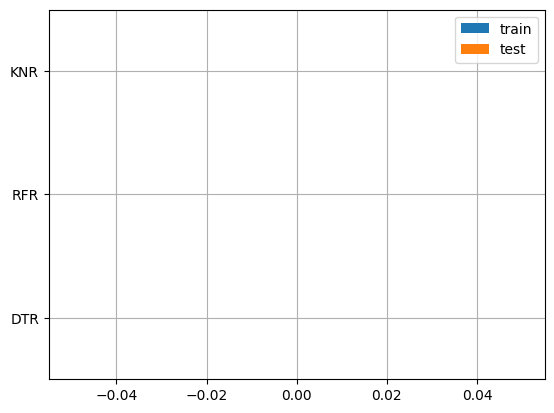

In [ ]:
fig, ax = plt.subplots()
rmse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari hasil di atas, terlihat bahwa model RFR memiliki hasil yang paling baik dibandingkan DTR dan KNR. Hal ini ditunjukkan pada nilai error dari hasil uji RFR memiliki nilai terkecil, dan tidak mengalami overfitting sebagaimana model DTR.

**Uji model dengan data test**

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

AttributeError: ignored

Pada pengujian kali ini didapatkan hasil prediksi yang mendekati nilai sesungguhnya diperoleh oleh model KNR.